Projet ML

In [37]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statistics as stat
import math

data = pd.read_csv('falldataproject.csv')
data.head()


,obs,raw_feat_X1,raw_feat_X2,raw_feat_X3,raw_feat_X4,raw_feat_X5,raw_feat_X6,raw_feat_X7,raw_feat_X8,raw_feat_X9,...,deriv_feat_X21,deriv_feat_X22,deriv_feat_X23,deriv_feat_X24,deriv_feat_X25,deriv_feat_X26,deriv_feat_X27,deriv_feat_X28,deriv_feat_X29,FALL
0,0,0.249744,-0.162770,0.223727,0.393904,-0.154366,0.128968,1.090661,0.913849,0.505526,...,0.121241,0.734862,0.179370,0.402461,0.638393,0.344236,0.823239,-0.409350,1.425206,1
1,1,0.385843,-0.660978,-0.127798,-0.205710,-0.160936,0.111606,0.171391,2.889781,0.377333,...,-0.182778,0.357499,-0.056181,0.840313,0.605672,0.655029,1.052671,-0.177353,1.613721,1
2,2,3.344528,-4.535931,0.165140,-0.228745,3.203818,3.379462,1.089901,2.097552,0.877990,...,0.425260,8.093449,-0.684318,0.046744,3.440332,3.965586,2.916183,0.367674,3.952479,1
3,3,3.190676,-2.884463,-1.153080,-0.698292,1.868221,2.493077,2.546198,3.817391,3.711000,...,-4.743065,-0.774592,-1.076903,-0.818687,3.572430,3.409429,2.407953,1.233629,2.702845,1
4,4,2.338575,-2.699941,-0.069211,-0.025849,1.420714,2.137326,1.097388,2.101987,1.200319,...,-2.766941,0.168817,-1.116162,-1.640847,1.527936,2.215856,2.353429,0.721413,2.933661,1


In [38]:
y=data.FALL
p=data.columns
Q=['raw_feat_X1', 'raw_feat_X2', 'raw_feat_X3', 'raw_feat_X4',
       'raw_feat_X5', 'raw_feat_X6', 'raw_feat_X7', 'raw_feat_X8',
       'raw_feat_X9', 'raw_feat_X10', 'raw_feat_X11', 'raw_feat_X12',
       'raw_feat_X13', 'raw_feat_X14', 'raw_feat_X15', 'raw_feat_X16',
       'raw_feat_X17', 'raw_feat_X18', 'raw_feat_X19', 'raw_feat_X20',
       'raw_feat_X21', 'raw_feat_X22', 'raw_feat_X23', 'raw_feat_X24',
       'raw_feat_X25', 'raw_feat_X26', 'raw_feat_X27', 'raw_feat_X28',
       'raw_feat_X29', 'fft_feat_X1', 'fft_feat_X2', 'fft_feat_X3',
       'fft_feat_X4', 'fft_feat_X5', 'fft_feat_X6', 'fft_feat_X7',
       'fft_feat_X8', 'fft_feat_X9', 'fft_feat_X10', 'fft_feat_X11',
       'fft_feat_X12', 'fft_feat_X13', 'fft_feat_X14', 'fft_feat_X15',
       'fft_feat_X16', 'fft_feat_X17', 'fft_feat_X18', 'fft_feat_X19',
       'fft_feat_X20', 'fft_feat_X21', 'fft_feat_X22', 'fft_feat_X23',
       'fft_feat_X24', 'fft_feat_X25', 'fft_feat_X26', 'fft_feat_X27',
       'fft_feat_X28', 'fft_feat_X29', 'deriv_feat_X1', 'deriv_feat_X2',
       'deriv_feat_X3', 'deriv_feat_X4', 'deriv_feat_X5', 'deriv_feat_X6',
       'deriv_feat_X7', 'deriv_feat_X8', 'deriv_feat_X9', 'deriv_feat_X10',
       'deriv_feat_X11', 'deriv_feat_X12', 'deriv_feat_X13', 'deriv_feat_X14',
       'deriv_feat_X15', 'deriv_feat_X16', 'deriv_feat_X17', 'deriv_feat_X18',
       'deriv_feat_X19', 'deriv_feat_X20', 'deriv_feat_X21', 'deriv_feat_X22',
       'deriv_feat_X23', 'deriv_feat_X24', 'deriv_feat_X25', 'deriv_feat_X26',
       'deriv_feat_X27', 'deriv_feat_X28', 'deriv_feat_X29']

In [39]:
X=data[Q]
X

,raw_feat_X1,raw_feat_X2,raw_feat_X3,raw_feat_X4,raw_feat_X5,raw_feat_X6,raw_feat_X7,raw_feat_X8,raw_feat_X9,raw_feat_X10,...,deriv_feat_X20,deriv_feat_X21,deriv_feat_X22,deriv_feat_X23,deriv_feat_X24,deriv_feat_X25,deriv_feat_X26,deriv_feat_X27,deriv_feat_X28,deriv_feat_X29
0,0.249744,-0.162770,0.223727,0.393904,-0.154366,0.128968,1.090661,0.913849,0.505526,-0.105793,...,-0.676243,0.121241,0.734862,0.179370,0.402461,0.638393,0.344236,0.823239,-0.409350,1.425206
1,0.385843,-0.660978,-0.127798,-0.205710,-0.160936,0.111606,0.171391,2.889781,0.377333,0.602582,...,0.549323,-0.182778,0.357499,-0.056181,0.840313,0.605672,0.655029,1.052671,-0.177353,1.613721
2,3.344528,-4.535931,0.165140,-0.228745,3.203818,3.379462,1.089901,2.097552,0.877990,0.200807,...,-1.376566,0.425260,8.093449,-0.684318,0.046744,3.440332,3.965586,2.916183,0.367674,3.952479
3,3.190676,-2.884463,-1.153080,-0.698292,1.868221,2.493077,2.546198,3.817391,3.711000,2.382995,...,-3.652617,-4.743065,-0.774592,-1.076903,-0.818687,3.572430,3.409429,2.407953,1.233629,2.702845
4,2.338575,-2.699941,-0.069211,-0.025849,1.420714,2.137326,1.097388,2.101987,1.200319,0.312032,...,-2.777213,-2.766941,0.168817,-1.116162,-1.640847,1.527936,2.215856,2.353429,0.721413,2.933661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,0.374009,-0.393421,-1.006611,-0.869544,0.071290,0.602322,0.602537,-0.044315,0.193429,-0.148948,...,0.724404,-0.638807,-0.019865,-1.037645,-0.407608,0.422673,0.373785,0.910394,1.013564,0.691957
2817,-0.395249,0.233952,-0.889436,-0.915149,-0.315548,-0.501953,-0.126918,0.281726,-0.052080,-0.145614,...,0.024081,-0.182778,-0.397228,-0.448767,-0.082170,-0.228123,-0.246219,0.082658,0.174371,0.013172
2818,0.024884,-3.022854,-4.785508,-6.306329,2.212054,2.742384,-0.595442,-0.564155,-0.290376,-0.168078,...,0.024081,0.121241,-0.019865,-0.841352,0.496768,0.406918,0.300967,1.382519,0.988116,1.383095
2819,0.297083,-0.338065,0.692427,0.809935,0.064951,0.591187,0.044342,-0.172519,-0.135639,-0.165500,...,0.199161,0.577270,0.168817,-0.919869,-1.012137,-0.108144,-0.075256,0.718484,0.721413,0.593425


In [40]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2816    0
2817    0
2818    0
2819    0
2820    0
Name: FALL, Length: 2821, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y)

### Fonction de vérification

In [42]:
from sklearn import metrics
def check(y_test,y_pred):
    print("Accuracy : ", metrics.accuracy_score(y_test,y_pred))
    print("Precision : ",   metrics.precision_score(y_test,y_pred))
    print("Recall : ",  metrics.recall_score(y_test,y_pred))
    print("F1-score : ", metrics.f1_score(y_test,y_pred))
    print("AUC : ", metrics.roc_auc_score(y_test,y_pred))

### Méthode de naive bayesien

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnbfit=gnb.fit(x_train, y_train)
y_pred_bayes=gnbfit.predict(x_test)
y_pred_bayes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [44]:
check(y_test,y_pred_bayes)

Accuracy :  0.9575070821529745
Precision :  0.6521739130434783
Recall :  0.8823529411764706
F1-score :  0.75
AUC :  0.9228558599012123


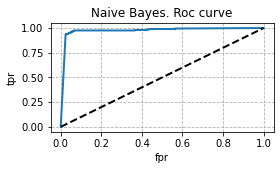

In [45]:
y_proba=gnbfit.predict_proba(X)[:,1];
fpr, tpr, thresholds=metrics.roc_curve(y, y_proba);
figure=plt.figure(figsize=(4,2));
plt.plot(fpr,tpr, linewidth=2);
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2);
plt.grid(linestyle='dashed');plt.show();

In [46]:
auc=metrics.roc_auc_score(y, y_proba);
print(auc)

0.9740207697745719


### LinearDiscriminantAnalysis

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()

In [49]:
ldafit = LDA.fit(x_train,y_train)
y_pred_lda = ldafit.predict(x_test)
check(y_test,y_pred_lda)

Accuracy :  0.9858356940509915
Precision :  0.9767441860465116
Recall :  0.8235294117647058
F1-score :  0.8936170212765957
AUC :  0.911001347103727


In [50]:
y_pred_lda

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

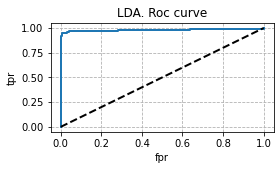

In [51]:
y_proba=ldafit.predict_proba(X)[:,1];
fpr, tpr, thresholds=metrics.roc_curve(y, y_proba);
figure=plt.figure(figsize=(4,2));
plt.plot(fpr,tpr, linewidth=2);
plt.title('LDA. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2);
plt.grid(linestyle='dashed');plt.show();

### QuadraticDiscriminantAnalysis

In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()

In [53]:
qdafit = QDA.fit(x_train,y_train)
y_pred_qda = qdafit.predict(x_test)
check(y_test,y_pred_qda)

Accuracy :  0.9872521246458924
Precision :  0.9038461538461539
Recall :  0.9215686274509803
F1-score :  0.9126213592233009
AUC :  0.9569675198323603


/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


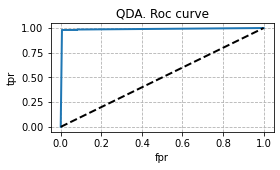

In [54]:
y_proba=qdafit.predict_proba(X)[:,1];
fpr, tpr, thresholds=metrics.roc_curve(y, y_proba);
figure=plt.figure(figsize=(4,2));
plt.plot(fpr,tpr, linewidth=2);
plt.title('QDA. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2);
plt.grid(linestyle='dashed');plt.show();

### LogisticRegression

In [55]:
from sklearn import linear_model
LR = linear_model.LogisticRegression(C=1e5)

In [56]:
lrfit = LR.fit(x_train,y_train)
y_pred_lr = lrfit.predict(x_test)
check(y_test,y_pred_lr)

Accuracy :  0.9773371104815864
Precision :  0.8431372549019608
Recall :  0.8431372549019608
F1-score :  0.8431372549019607
AUC :  0.9154617572219728


/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

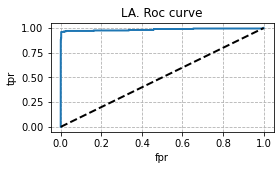

In [58]:
y_proba=lrfit.predict_proba(X)[:,1];
fpr, tpr, thresholds=metrics.roc_curve(y, y_proba);
figure=plt.figure(figsize=(4,2));
plt.plot(fpr,tpr, linewidth=2);
plt.title('LA. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2);
plt.grid(linestyle='dashed');plt.show();

### Décision tree:recherche de meta paramètres optimaux

In [60]:
from sklearn.model_selection import ShuffleSplit

#Choix de meilleur meta paramètres de décision tree
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

def tree_opti():
    n = 100                #K-fold avec n=100
    test_size = 0.25       #taille de data test
    critere = 0            #initialisation de critère comparé
    seperation = ShuffleSplit(n_splits=n, test_size=test_size)#séparation de données
    compteur = 1     #compteur
    for k in range (3,10):  #max depth
        for j in range (2,10):   #min samples split
            for i in range (2,10):  #min samples leaf
                compteur=compteur+1
                AUC=[]
                treec = tree.DecisionTreeClassifier(max_depth=k,min_samples_split=i,min_samples_leaf=j)
                for train_index, test_index in seperation.split(X):
                    x_train,y_train=X.iloc[train_index],y.iloc[train_index]
                    x_test,y_test=X.iloc[test_index],y.iloc[test_index]
                    res = AUC.append(metrics.roc_auc_score(treec.fit(x_train,y_train).predict(x_test),y_test))

                temp=np.mean(AUC)
                if temp> critere:   
                    critere = temp #on remplace le critere une fois qu'on a
                    #un mieux critère, ainsi pour max_k j i
                    max_depth = k
                    split = j
                    leafs = i
    return((max_depth,split,leafs))

In [61]:
#print(tree_opti())
#Meta paramètres optimaux : 3 4 4

3 2 2
3 2 3
3 2 4
3 2 7
3 4 4
(3, 4, 4)


### décision tree model

In [62]:
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier

tree = tree.DecisionTreeClassifier(max_depth=3,min_samples_split=4,min_samples_leaf=4)

fit_tree = tree.fit(x_train,y_train)
y_pred_tree = fit_tree.predict(x_test)

check(y_test,y_pred_tree)

Accuracy :  0.9844192634560907
Precision :  0.9545454545454546
Recall :  0.8235294117647058
F1-score :  0.8842105263157896
AUC :  0.9102379883251009


### Bagging

### Bagging: paramètre optimale

In [63]:
from sklearn.ensemble import BaggingClassifier 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

def bagging_opt():
    treeopt= tree.DecisionTreeClassifier(max_depth=3,min_samples_split=4,min_samples_leaf=4)
    critere=0
    n = 100
    test_size = 0.25
    separation= ShuffleSplit(n_splits=n, test_size=test_size)
    for i in range (10,20):
        bagopt = BaggingClassifier(base_estimator=treeopt,n_estimators=i)
        AUC = []
        for train_index, test_index in separation.split(X):
            x_train,y_train=X.iloc[train_index],y.iloc[train_index]
            x_test,y_test=X.iloc[test_index],y.iloc[test_index]        
            res = AUC.append(metrics.roc_auc_score(bagopt.fit(x_train,y_train).predict(x_test),y_test))        
        temp = np.mean(AUC)
        if temp > critere:
            critere = temp
            max_n_estimator = i
    return (max_n_estimator)



In [64]:
#print(bagging_opt())
#paramètre optimale: 19

0.9762556921644283 10
0.9779453461171548 11
0.9782737002380917 12
0.9784936257019529 13
0.9787833978695706 14
0.9794449668859273 15
0.9807659213075972 19
19


In [65]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier

tree = tree.DecisionTreeClassifier(max_depth=3,min_samples_split=4,min_samples_leaf=4)
baggingopt = BaggingClassifier(base_estimator=tree,n_estimators=19,random_state=0)
bagfit = baggingopt.fit(x_train,y_train)
y_pred_baggingopt = bagfit.predict(x_test)
check(y_test,y_pred_baggingopt)

Accuracy :  0.9844192634560907
Precision :  0.9761904761904762
Recall :  0.803921568627451
F1-score :  0.8817204301075269
AUC :  0.9011974255350996


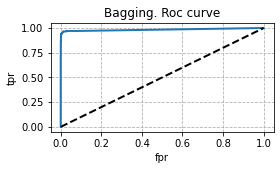

In [66]:
y_proba=bagfit.predict_proba(X)[:,1];
fpr, tpr, thresholds=metrics.roc_curve(y, y_proba);
figure=plt.figure(figsize=(4,2));
plt.plot(fpr,tpr, linewidth=2);
plt.title('Bagging. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2);
plt.grid(linestyle='dashed');plt.show();

### Random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=4,random_state=0)

RFfit = RF.fit(x_train,y_train)
y_pred_RF = RFfit.predict(x_test)

check(y_test,y_pred_RF)

Accuracy :  0.9886685552407932
Precision :  0.9777777777777777
Recall :  0.8627450980392157
F1-score :  0.9166666666666665
AUC :  0.930609190240982


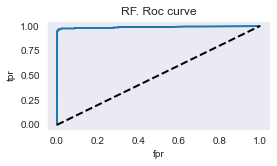

In [143]:
y_proba=RFfit.predict_proba(X)[:,1];
fpr, tpr, thresholds=metrics.roc_curve(y, y_proba);
figure=plt.figure(figsize=(4,2));
plt.plot(fpr,tpr, linewidth=2);
plt.title('RF. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2);
plt.grid(linestyle='dashed');plt.show();

### Adaboost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

Ab = AdaBoostClassifier(n_estimators=100, random_state=0)

abfit=Ab.fit(x_train, y_train)
y_pred_ab = abfit.predict(x_test)

check(y_test,y_pred_ab)

Accuracy :  0.9787535410764873
Precision :  0.8913043478260869
Recall :  0.803921568627451
F1-score :  0.845360824742268
AUC :  0.8981439904205958


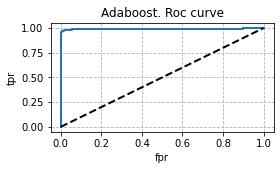

In [70]:
y_proba=abfit.predict_proba(X)[:,1];
fpr, tpr, thresholds=metrics.roc_curve(y, y_proba);
figure=plt.figure(figsize=(4,2));
plt.plot(fpr,tpr, linewidth=2);
plt.title('Adaboost. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2);
plt.grid(linestyle='dashed');plt.show();

### KNN

### KNN : meilleur K

In [78]:
from sklearn.neighbors import KNeighborsClassifier


def opt_k(n,test_size=0.25):
    res = np.zeros(10)
    seperation = ShuffleSplit(n_splits=n, test_size=test_size)
    for train_index, test_index in seperation.split(X):
        x_train,y_train=X.iloc[train_index],y.iloc[train_index]
        x_test,y_test=X.iloc[test_index],y.iloc[test_index]
        AUC=[]
        max_k=0
        critere = 0
        for k in range(1,10):
            knn = KNeighborsClassifier(k)
            #pred_knn = knn.fit(x_train, y_train).score(x_test,y_test)
            #AUC.append(pred_knn)
        #res[AUC.index(max(AUC))] = res[AUC.index(max(AUC))]+1
    #return (np.array(res)/n)
            


       
            res = AUC.append(metrics.roc_auc_score(knn.fit(x_train,y_train).predict(x_test),y_test) )     
            temp = np.mean(AUC)
        if temp > critere:
            critere = temp
            max_k = k
    return (max_k)

#k=opt_k(50)
#print(k)
#meilleur k:9



9


### KNN model

In [77]:
KNN = KNeighborsClassifier(n_neighbors = 9)
fit_knn = KNN.fit(x_train,y_train)
y_pred_knn = fit_knn.predict(x_test)
check(y_test,y_pred_knn)

Accuracy :  0.9844192634560907
Precision :  0.9545454545454546
Recall :  0.8235294117647058
F1-score :  0.8842105263157896
AUC :  0.9102379883251009


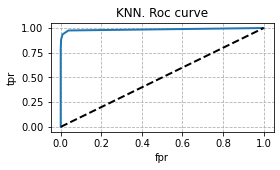

In [79]:
y_proba=fit_knn.predict_proba(X)[:,1];
fpr, tpr, thresholds=metrics.roc_curve(y, y_proba);
figure=plt.figure(figsize=(4,2));
plt.plot(fpr,tpr, linewidth=2);
plt.title('KNN. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2);
plt.grid(linestyle='dashed');plt.show();

### Matrice de validation croisée 

In [111]:
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



GNB = GaussianNB()
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
LR = linear_model.LogisticRegression(C=1e5)
KNN = KNeighborsClassifier(n_neighbors = 9)
tree = tree.DecisionTreeClassifier(max_depth=3,min_samples_split=4,min_samples_leaf=4)
bagmod = BaggingClassifier(base_estimator=tree,n_estimators=19)
RF = RandomForestClassifier(max_depth=4,random_state=0)
Ab = AdaBoostClassifier(n_estimators=100, random_state=0)




def Matrice_validation_coisee_auc(X,Y,n,test_size=0.25):    
    seperation = ShuffleSplit(n_splits=n, test_size=test_size)    
    i=0
    mat=np.zeros(n*18).reshape(n,18)
    while i<n:
        for train_index, test_index in seperation.split(X):
            x_train,y_train=X.iloc[train_index],Y.iloc[train_index]
            x_test,y_test=X.iloc[test_index],Y.iloc[test_index]
            for j in range (0,18):
                
                #Pour la partie train
                if j==0:
                    mat[i,j]=metrics.roc_auc_score(GNB.fit(x_train,y_train).predict(x_train),y_train)
                if j==1:
                    mat[i,j]=metrics.roc_auc_score(LDA.fit(x_train,y_train).predict(x_train),y_train)
                if j==2:
                    mat[i,j]=metrics.roc_auc_score(QDA.fit(x_train,y_train).predict(x_train),y_train)
                if j==3:
                    mat[i,j]=metrics.roc_auc_score(LR.fit(x_train,y_train).predict(x_train),y_train)
                if j==4:
                    mat[i,j]=metrics.roc_auc_score(KNN.fit(x_train,y_train).predict(x_train),y_train)
                if j==5:
                    mat[i,j]=metrics.roc_auc_score(tree.fit(x_train,y_train).predict(x_train),y_train)
                if j==6:
                    mat[i,j]=metrics.roc_auc_score(bagmod.fit(x_train,y_train).predict(x_train),y_train)
                if j==7:
                    mat[i,j]=metrics.roc_auc_score(RF.fit(x_train,y_train).predict(x_train),y_train)
                if j==8:
                    mat[i,j]=metrics.roc_auc_score(Ab.fit(x_train,y_train).predict(x_train),y_train)
                 
                
                #Pour la partie test
                if j==9:
                    mat[i,j]=metrics.roc_auc_score(GNB.fit(x_train,y_train).predict(x_test),y_test)
                if j==10:
                    mat[i,j]=metrics.roc_auc_score(LDA.fit(x_train,y_train).predict(x_test),y_test)
                if j==11:
                    mat[i,j]=metrics.roc_auc_score(QDA.fit(x_train,y_train).predict(x_test),y_test)
                if j==12:
                    mat[i,j]=metrics.roc_auc_score(LR.fit(x_train,y_train).predict(x_test),y_test)
                if j==13:
                    mat[i,j]=metrics.roc_auc_score(KNN.fit(x_train,y_train).predict(x_test),y_test)
                if j==14:
                    mat[i,j]=metrics.roc_auc_score(tree.fit(x_train,y_train).predict(x_test),y_test)
                if j==15:
                    mat[i,j]=metrics.roc_auc_score(bagmod.fit(x_train,y_train).predict(x_test),y_test)
                if j==16:
                    mat[i,j]=metrics.roc_auc_score(RF.fit(x_train,y_train).predict(x_test),y_test)
                if j==17:
                    mat[i,j]=metrics.roc_auc_score(Ab.fit(x_train,y_train).predict(x_test),y_test)
            i+=1
    return mat

In [112]:
def Matrice_validation_coisee_recall(X,Y,n,test_size=0.25):    
    seperation = ShuffleSplit(n_splits=n, test_size=test_size)    
    i=0
    mat=np.zeros(n*18).reshape(n,18)
    while i<n:
        for train_index, test_index in seperation.split(X):
            x_train,y_train=X.iloc[train_index],Y.iloc[train_index]
            x_test,y_test=X.iloc[test_index],Y.iloc[test_index]
            for j in range (0,18):
                
                #Pour la partie train
                if j==0:
                    mat[i,j]=metrics.recall_score(GNB.fit(x_train,y_train).predict(x_train),y_train)
                if j==1:
                    mat[i,j]=metrics.recall_score(LDA.fit(x_train,y_train).predict(x_train),y_train)
                if j==2:
                    mat[i,j]=metrics.recall_score(QDA.fit(x_train,y_train).predict(x_train),y_train)
                if j==3:
                    mat[i,j]=metrics.recall_score(LR.fit(x_train,y_train).predict(x_train),y_train)
                if j==4:
                    mat[i,j]=metrics.recall_score(KNN.fit(x_train,y_train).predict(x_train),y_train)
                if j==5:
                    mat[i,j]=metrics.recall_score(tree.fit(x_train,y_train).predict(x_train),y_train)
                if j==6:
                    mat[i,j]=metrics.recall_score(bagmod.fit(x_train,y_train).predict(x_train),y_train)
                if j==7:
                    mat[i,j]=metrics.recall_score(RF.fit(x_train,y_train).predict(x_train),y_train)
                if j==8:
                    mat[i,j]=metrics.recall_score(Ab.fit(x_train,y_train).predict(x_train),y_train)
                 
                
                #Pour la partie test
                if j==9:
                    mat[i,j]=metrics.recall_score(GNB.fit(x_train,y_train).predict(x_test),y_test)
                if j==10:
                    mat[i,j]=metrics.recall_score(LDA.fit(x_train,y_train).predict(x_test),y_test)
                if j==11:
                    mat[i,j]=metrics.recall_score(QDA.fit(x_train,y_train).predict(x_test),y_test)
                if j==12:
                    mat[i,j]=metrics.recall_score(LR.fit(x_train,y_train).predict(x_test),y_test)
                if j==13:
                    mat[i,j]=metrics.recall_score(KNN.fit(x_train,y_train).predict(x_test),y_test)
                if j==14:
                    mat[i,j]=metrics.recall_score(tree.fit(x_train,y_train).predict(x_test),y_test)
                if j==15:
                    mat[i,j]=metrics.recall_score(bagmod.fit(x_train,y_train).predict(x_test),y_test)
                if j==16:
                    mat[i,j]=metrics.recall_score(RF.fit(x_train,y_train).predict(x_test),y_test)
                if j==17:
                    mat[i,j]=metrics.recall_score(Ab.fit(x_train,y_train).predict(x_test),y_test)
            i+=1
    return mat

In [113]:
matrice_auc = Matrice_validation_coisee_auc(X,y,50)
matrice_recall = Matrice_validation_coisee_recall(X,y,50)

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/liaopuwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning

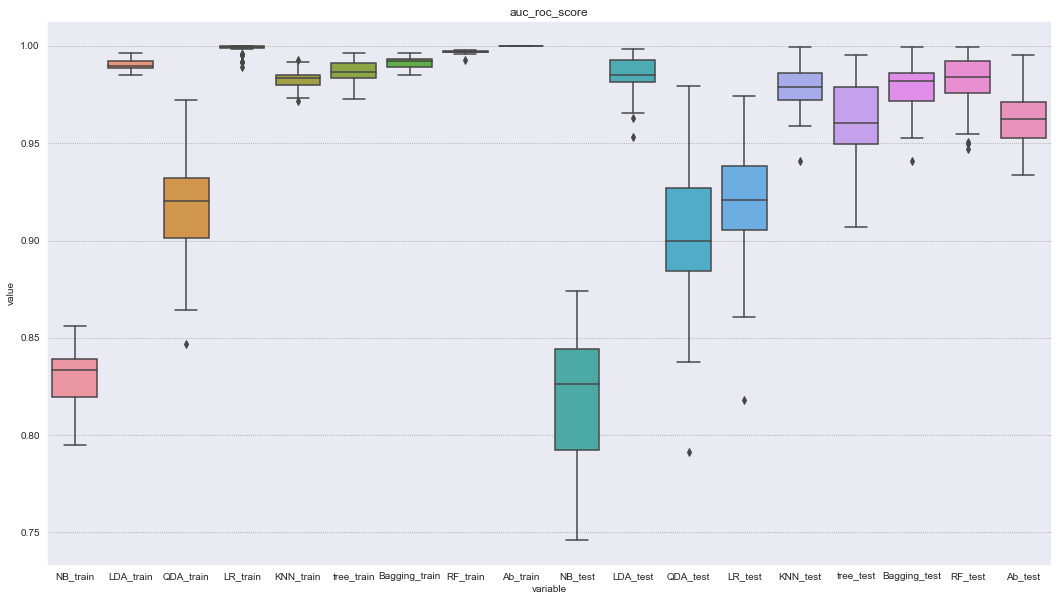

In [137]:
import seaborn as sns

plt.figure(figsize=(18,10))


cols = ['NB_train', 'LDA_train', 'QDA_train', 'LR_train','KNN_train','tree_train','Bagging_train','RF_train','Ab_train','NB_test', 'LDA_test', 'QDA_test', 'LR_test','KNN_test','tree_test','Bagging_test','RF_test','Ab_test']
df = pd.DataFrame(data=matrice_auc,columns=cols)
sns.boxplot(x="variable", y="value",data=pd.melt(df))
plt.title("AUC_ROC_SCORE")
plt.show()

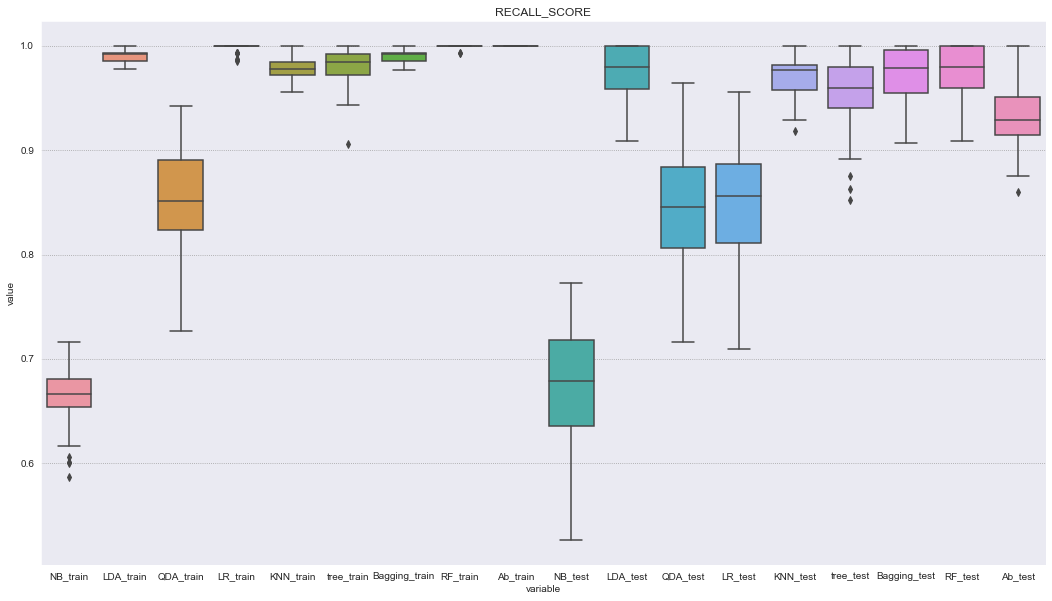

In [139]:
plt.figure(figsize=(18,10))

df2 = pd.DataFrame(data=matrice_recall,columns=cols)
sns.boxplot(x="variable", y="value",data=pd.melt(df2))
plt.title("RECALL_SCORE")
plt.show()